In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelBinarizer
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score
import os

In [2]:
data = pd.read_csv("houseprediction.csv")

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
numeric_data = data.select_dtypes(include = 'number').describe()

In [5]:
numeric_data.drop(["id","waterfront","zipcode"],axis=1).describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,8.000000e+00,8.000000,8.000000,8.000000,8.000000e+00,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,1.265138e+06,2707.537613,2703.798115,5541.042579,2.191707e+05,2703.004287,2702.250078,2704.132522,2707.229041,4861.185209,3465.885511,4181.422318,3014.260187,2737.294115,2610.051241,4572.992974,119542.454410
std,2.608788e+06,7638.968001,7640.471736,7766.859006,5.788300e+05,7640.792167,7641.096984,7640.336375,7639.086037,7361.316574,7510.466223,7076.100744,7546.658183,7626.954968,7678.470016,7112.749158,303839.264671
min,2.161300e+04,0.000000,0.000000,290.000000,5.200000e+02,0.539989,0.000000,0.650743,1.000000,290.000000,0.000000,29.373411,0.000000,0.138564,-122.519000,399.000000,651.000000
25%,2.602125e+05,2.482515,1.505041,1299.860224,6.973500e+03,1.000000,0.000000,2.500000,5.543865,1099.522744,0.000000,1938.250000,0.000000,47.392225,-122.254500,1288.847826,6990.000000
50%,4.086811e+05,3.185421,2.182379,1994.949868,1.289748e+04,1.497154,0.117152,3.204715,7.328437,1674.195345,367.042044,1973.002568,42.201129,47.565926,-122.169448,1913.276246,11425.727826
75%,5.663866e+05,11.250000,3.875000,5297.500000,2.656488e+04,2.375000,1.574738,4.250000,9.250000,4010.000000,1625.000000,2001.500000,805.009430,47.702900,-90.951043,3322.500000,23035.794908
max,7.700000e+06,21613.000000,21613.000000,21613.000000,1.651359e+06,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,871200.000000


In [6]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [8]:
#created a function which would automaticaly plot scatter plots for all the variables with y axis as price
#the graphs would get started in the current directory if no directory has been specified
def graphs(data,columns=None,directory=os.getcwd()+'\\'):
    if columns==None:
        columns=list(data.columns)
    df=data[columns]
    dataN=df.select_dtypes(include='number')
    for i in range(dataN.shape[1]):
        fig=plt.figure(figsize=(10,10))
        fig=plt.scatter(x=dataN.iloc[:,i],y=dataN["price"])
        plt.ylabel("price")
        plt.xlabel(dataN.columns[i])
        plt.title('scattercplot of %s'%ddataN.columns[i])
        plt.savefig(directory+dataN.columns[i]+".png")
        plt.close

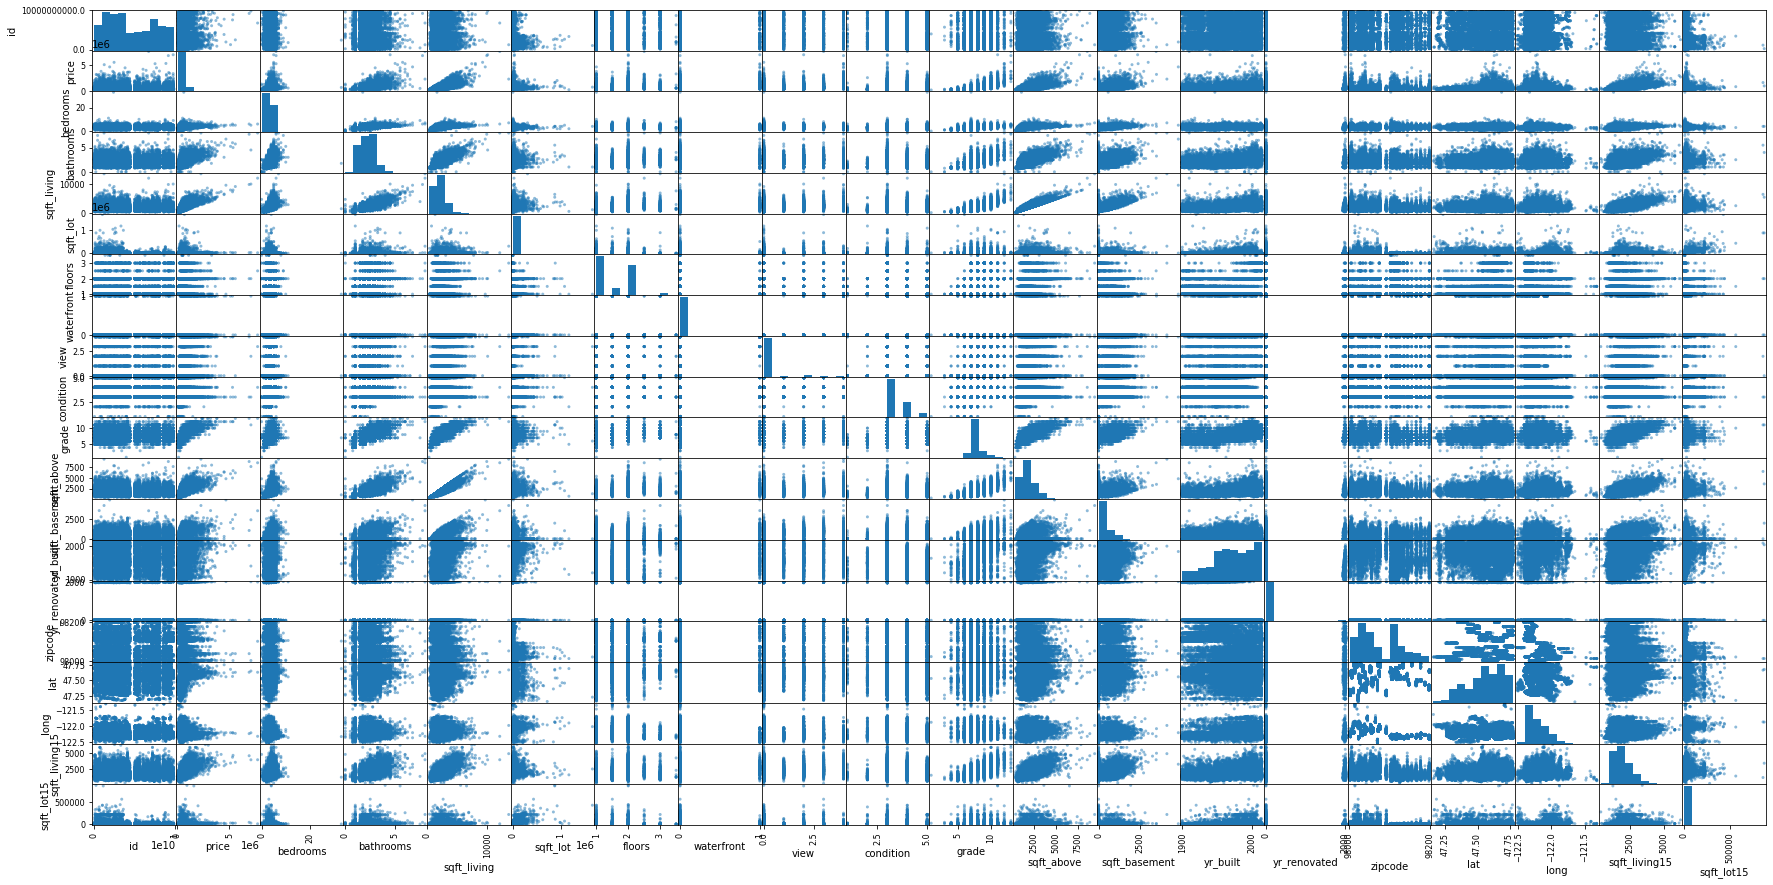

In [9]:
#bivariate analysis by plotting pairwise scatterplot
scatter_matrix((data),alpha=0.5,figsize=(30,15),diagonal='hist')
plt.show()

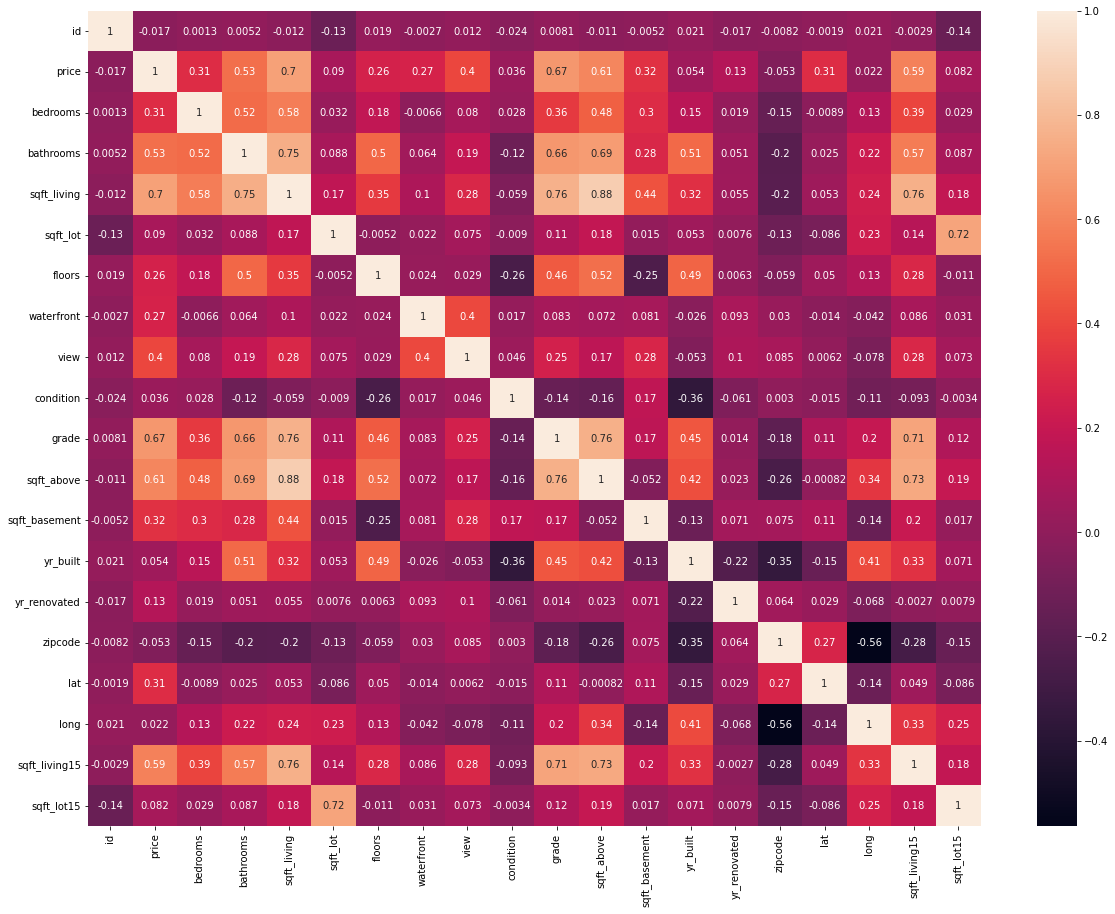

In [10]:
#bivariate analysis
#checking for correlation using heat map
#A heatmap is a graphical representation of data that uses s system of color-coding to represent different values
cor=data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(cor,annot=True)
plt.show()

In [11]:
# i have used all the quantitative values as predictors
COLUMNS=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement','lat','long','sqft_living']
x_train=data[COLUMNS]
y_train=data.price

In [12]:
regr=LinearRegression()
regr.fit(x_train,y_train)

LinearRegression()

In [13]:
regr.coef_

array([-5.31453838e+04,  2.36463457e+04,  1.18652514e+02,  4.52137673e-02,
       -2.28018653e+04,  8.01423322e+01,  3.85101824e+01,  6.69341220e+05,
       -3.46246954e+05,  1.18652514e+02])

In [14]:
scores=cross_val_score(regr,x_train,y_train,cv=10,scoring='neg_root_mean_squared_error')
cv_score=np.mean(abs(scores))
print("\nRMSE value for 10 fold cross validation is : %g"%cv_score)


RMSE value for 10 fold cross validation is : 234652


In [15]:
scores=cross_val_score(regr,x_train,y_train,cv=10,scoring='r2')
cv_score=np.mean(scores)
print("\nR_square value for 10 fold cross validation is : %g"%cv_score)


R_square value for 10 fold cross validation is : 0.588865


In [16]:
#used a combination of continues and ordinal variable which showed positive correlation with price
#assuming that ordinal variables have equal intervals
COLUMNS=["lat","sqft_living","grade","waterfront"]
x_train=data[COLUMNS] #prediction
y_train=data.price #target variable

In [17]:
#fitting the model
regr=LinearRegression()
regr.fit(x_train,y_train)

LinearRegression()

In [18]:
regr.coef_

array([6.75492648e+05, 1.85159469e+02, 8.40073441e+04, 8.47772913e+05])

In [19]:
#doing 10 fold cv with RMSE as performance metric
scores=cross_val_score(regr,x_train,y_train,cv=10,scoring='neg_root_mean_squared_error')
cv_score=np.mean(abs(scores))
print("\nRMSE value for 10 fold cross-validation is :%g"%cv_score)


RMSE value for 10 fold cross-validation is :221747


In [20]:
#doing 10 fold cv with R2 as performance metric
scores=cross_val_score(regr,x_train,y_train,cv=10,scoring='r2')
cv_score=np.mean(scores)
print("\nR_square value for 10-fold cross-validation is :%g"%cv_score)


R_square value for 10-fold cross-validation is :0.632616


In [21]:
#type 1
#creating binary variable for renovation
#if renoved =1
#if never renovated =0
renovated=[]
for i in range(len(data.yr_renovated)):
    if data.yr_renovated[i]==0:
        renovated.append(0)
    else:
        renovated.append(1)

In [22]:
#type 2
#feature transformation of your built into age
age=2021 -data["yr_built"]

In [24]:
#type 3
#one hot encoding or dummy variables can be only used for nominal variables
#converting grade of the house as dummt variables by one-hot encoding
lb=LabelBinarizer()
zip_dummies=lb.fit_transform(data.zipcode)
zip_dummy=pd.DataFrame(zip_dummies,columns=lb.classes_)

In [25]:
#type 4
#tried different techniques such as long transformation,scaling,square root of prediction but none of the worked
#transformation that variables
#concatenating the transformed variables with data frame
X_=pd.concat([data[["lat","sqft_living"]],age],axis=1)**2
x_X=data[["condition","grade","waterfront"]]


In [26]:
X_=pd.concat([data[["lat","sqft_living"]],age],axis=1)**2
x_X=data[["condition","grade","waterfront"]]
x_train=pd.concat([X_,x_X],axis=1)
y_train=data.price

In [27]:
#fitting the model
regr=LinearRegression()
regr.fit(x_train,y_train)

LinearRegression()

In [28]:
regr.coef_

array([5.86818195e+03, 3.20686044e-02, 1.96413628e+01, 3.56435787e+04,
       1.20216868e+05, 7.45554934e+05])

In [29]:
#doing 10 fold cv with RMSE as performance metric
scores=cross_val_score(regr,x_train,y_train,cv=10,scoring='neg_root_mean_squared_error')
cv_score=np.mean(abs(scores))
print("\nRMSE value for 10 fold cross-validation is :%g"%cv_score)


RMSE value for 10 fold cross-validation is :197823


In [30]:
#doing 10 fold cv with R2 as performance metric
scores=cross_val_score(regr,x_train,y_train,cv=10,scoring='r2')
cv_score=np.mean(scores)
print("\nR_square value for 10-fold cross-validation is :%g"%cv_score)


R_square value for 10-fold cross-validation is :0.706324


In [31]:
X_=pd.concat([data[["lat","sqft_living"]],age],axis=1)**2
x_X=data[["condition","grade","waterfront"]]

x_train=pd.concat([X_,x_X],axis=1)
y_train=data.price

In [57]:
#for max_depth
value=15
hyperparameter_tuning=[]
for K in range(1,value):
    model=DecisionTreeRegressor(max_depth=K)
    #calculating the cv square for decision tree model using MAE performance metric by setting split size=10
    CV_decisontree=np.mean(abs(cross_val_score(model,x_train,y_train,cv=10,scoring='neg_mean_absolute_error')))
    hyperparameter_tuning.append(CV_decisontree)
    val=hyperparameter_tuning.index(min(hyperparameter_tuning))
    print('\n',"The minimum of mean(CV_score) of Decison_tree_model is %g and value of k is = %g"%(min(hyperparameter_tuning),val))


 The minimum of mean(CV_score) of Decison_tree_model is 190434 and value of k is = 0

 The minimum of mean(CV_score) of Decison_tree_model is 156488 and value of k is = 1

 The minimum of mean(CV_score) of Decison_tree_model is 139144 and value of k is = 2

 The minimum of mean(CV_score) of Decison_tree_model is 129857 and value of k is = 3

 The minimum of mean(CV_score) of Decison_tree_model is 117710 and value of k is = 4

 The minimum of mean(CV_score) of Decison_tree_model is 111545 and value of k is = 5

 The minimum of mean(CV_score) of Decison_tree_model is 106191 and value of k is = 6

 The minimum of mean(CV_score) of Decison_tree_model is 102155 and value of k is = 7

 The minimum of mean(CV_score) of Decison_tree_model is 99459.8 and value of k is = 8

 The minimum of mean(CV_score) of Decison_tree_model is 99084.3 and value of k is = 9

 The minimum of mean(CV_score) of Decison_tree_model is 99084.3 and value of k is = 9

 The minimum of mean(CV_score) of Decison_tree_mod

In [58]:
#for min sample_leaf
value=100
hyperparameter_tuning=[]
for K in range(1,value):
    model1=DecisionTreeRegressor(max_depth=val,min_samples_leaf=K)
    CV_decisontree=np.mean(abs(cross_val_score(model,x_train,y_train,cv=10,scoring='neg_mean_absolute_error')))
    hyperparameter_tuning.append(CV_decisontree)
    val1=hyperparameter_tuning.index(min(hyperparameter_tuning))
    print('\n',"the minimum of mean(CV_score) of Decision_Tree_model is %g and value of k is=%g"%(min(hyperparameter_tuning),val1))


 the minimum of mean(CV_score) of Decision_Tree_model is 105671 and value of k is=0

 the minimum of mean(CV_score) of Decision_Tree_model is 105671 and value of k is=0

 the minimum of mean(CV_score) of Decision_Tree_model is 105664 and value of k is=2

 the minimum of mean(CV_score) of Decision_Tree_model is 105664 and value of k is=2

 the minimum of mean(CV_score) of Decision_Tree_model is 105664 and value of k is=2

 the minimum of mean(CV_score) of Decision_Tree_model is 105489 and value of k is=5

 the minimum of mean(CV_score) of Decision_Tree_model is 105489 and value of k is=5

 the minimum of mean(CV_score) of Decision_Tree_model is 105489 and value of k is=5

 the minimum of mean(CV_score) of Decision_Tree_model is 105489 and value of k is=5

 the minimum of mean(CV_score) of Decision_Tree_model is 105468 and value of k is=9

 the minimum of mean(CV_score) of Decision_Tree_model is 105468 and value of k is=9

 the minimum of mean(CV_score) of Decision_Tree_model is 105343 

In [62]:
#for min sample_split
value=5
hyperparameter_tuning=[]
for K in range(1,value):
    model=DecisionTreeRegressor(max_depth=9,min_samples_leaf=val1,min_samples_split=val1+K)
    CV_decisontree=np.mean(abs(cross_val_score(model,x_train,y_train,cv=10,scoring='neg_mean_absolute_error')))
    hyperparameter_tuning.append(CV_decisontree)
    val2=hyperparameter_tuning.index(min(hyperparameter_tuning))+val1
    print('\n',"the minimum of mean(CV_score) of Decision_Tree_model is %g and value of k is=%g"%(min(hyperparameter_tuning),val2))


 the minimum of mean(CV_score) of Decision_Tree_model is 105912 and value of k is=96

 the minimum of mean(CV_score) of Decision_Tree_model is 105912 and value of k is=96

 the minimum of mean(CV_score) of Decision_Tree_model is 105912 and value of k is=96

 the minimum of mean(CV_score) of Decision_Tree_model is 105912 and value of k is=96


In [64]:
#initiating model
model_decison_tree=DecisionTreeRegressor(max_depth=val,min_samples_leaf=val1,min_samples_split=val2)
model_decison_tree=model_decison_tree.fit(x_train,y_train)

In [65]:
#doing 10 fold cv with RMSE as performance metric
CV_decisontree=np.mean(abs(cross_val_score(model_decison_tree,x_train,y_train,cv=10,scoring='neg_mean_absolute_error')))
print("\nRMSE value for decison tree 10-fild cross-validationis :%g"%CV_decisontree)


RMSE value for decison tree 10-fild cross-validationis :105912


In [66]:
#doing 10 fold cv with r2 as performance metric
CV_decisontree=np.mean(abs(cross_val_score(model_decison_tree,x_train,y_train,cv=10,scoring='r2')))
print("\nRMSE value for decison tree 10-fild cross-validationis :%g"%CV_decisontree)


RMSE value for decison tree 10-fild cross-validationis :0.69203


In [67]:
#loading test data
testing = pd.read_csv("houseprediction.csv")

In [68]:
testing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [69]:
age_test=2021 -testing["yr_built"]
X_ =pd.concat([testing[["lat","sqft_living"]],age_test],axis=1)**2
x_X=testing[["condition","grade","waterfront"]]
x_test=pd.concat([X_,x_X],axis=1)
y_test=testing.price

In [70]:
#fitting the model
regr=LinearRegression()
regr.fit(x_train,y_train)

LinearRegression()

In [71]:
regr.coef_

array([5.86818195e+03, 3.20686044e-02, 1.96413628e+01, 3.56435787e+04,
       1.20216868e+05, 7.45554934e+05])

In [72]:
y_pred=regr.predict(x_test)

In [73]:
#checking the performance of the model using RMSE
error=y_test -y_pred
RMSE=np.sqrt(np.mean(error**2))
print("\nRMSE value for Linear regression model is :%g"%RMSE)


RMSE value for Linear regression model is :197261


In [74]:
#checking the performance of the model using RMSE
MAE=np.mean(abs(error))
MAE

122850.17580573332

In [75]:
#checkinh r-square value
r_square=regr.score(x_test,y_test)
r_square

0.711653771921819

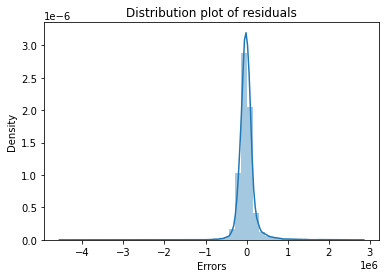

In [76]:
#checking weather error is following a normal distributation or not
sns.distplot(error)
plt.xlabel("Errors")
plt.ylabel("Density")
plt.title("Distribution plot of residuals")
plt.show()

In [77]:
#initating model
model_decison_tree_test=DecisionTreeRegressor(max_depth=val,min_samples_leaf=val1,min_samples_split=val2)
model_decison_tree_test=model_decison_tree_test.fit(x_train,y_train)

In [79]:
y_pred=model_decison_tree_test.predict(x_test)

In [80]:
#checkinh the performance of the model using RMSE
error=y_test-y_pred
RMSE=np.sqrt(np.mean(error**2))
RMSE

195403.90020258282

In [81]:
#checking the performance of the model using RMSE
MAE=np.mean(abs(error))
MAE

101296.83256155282

In [83]:
#checking for r_square value
R_square=model_decison_tree.score(x_test,y_test)
R_square

0.7170579206373311